In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-and-fake-news-dataset/news.csv


In [2]:
#import pandas library

import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv('/kaggle/input/real-and-fake-news-dataset/news.csv')


#print the shape of dataframe
df.shape

#print top 5 rows
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#check the distribution of labels 
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [4]:
#Add the new column "label_num" which gives a unique number to each of these labels 
target={'REAL':0, 'FAKE':1}
df['label_num']= df.label.map(target)

#check the results with top 5 rows
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0


In [16]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split  
#from sklearn.metrics import classifier_report

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too

X_train, X_test , y_train, y_test = train_test_split(
df.text,
df.label_num,
test_size=0.2,
stratify= df.label_num,
random_state= 2345
) 


In [17]:
y_train.shape

(5068,)

In [18]:
#print the shapes of X_train and X_test
X_train.shape


(5068,)

In [19]:
X_test.shape

(1267,)

In [22]:
#1. create a pipeline object
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_extraction.text import CountVectorizer

clf= Pipeline(
[
    ('BOW_',CountVectorizer(ngram_range=(1,3))) ,
    ('model',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

#2. fit with X_train and y_train
clf.fit(X_train,y_train)



#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       676
           1       0.71      0.76      0.73       591

    accuracy                           0.74      1267
   macro avg       0.74      0.74      0.74      1267
weighted avg       0.74      0.74      0.74      1267



In [25]:
#using kNN but with different arguments 
#using bag of ngrams countvectorizer

from sklearn.metrics import classification_report 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier

clf= Pipeline([
    ('Bag_of_ngram', CountVectorizer(ngram_range=(1,3))),
    ('Model',KNeighborsClassifier(n_neighbors=10, metric= 'euclidean'))  
])

#training 
clf.fit(X_train, y_train)


#test
y_preds=clf.predict(X_test)

#classification report

print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       600
           1       0.76      0.72      0.74       667

    accuracy                           0.73      1267
   macro avg       0.73      0.73      0.73      1267
weighted avg       0.73      0.73      0.73      1267



Attempt 3 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ('bag_ngrams',CountVectorizer(ngram_range=(3,3))),
    ('model',RandomForestClassifier())
])


#Training the model 

clf.fit(X_train, y_train)

#testing the model 
y_preds=clf.predict(X_test)

#build classification report 

print(classification_report(y_preds,y_test))



              precision    recall  f1-score   support

           0       0.80      0.91      0.85       553
           1       0.92      0.82      0.87       714

    accuracy                           0.86      1267
   macro avg       0.86      0.87      0.86      1267
weighted avg       0.87      0.86      0.86      1267



Attempt 4 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with both unigram and bigrams.
use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
print the classification report.

In [79]:
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer



clf = Pipeline([
    ('BoW',CountVectorizer(ngram_range=(1,2))),
    ('model',MultinomialNB(alpha=0.75))
])

#Training the data
clf.fit(X_train,y_train)

#test 
y_preds = clf.predict(X_test)

#reporting the report 
print (classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       733
           1       0.82      0.97      0.88       534

    accuracy                           0.89      1267
   macro avg       0.89      0.90      0.89      1267
weighted avg       0.91      0.89      0.89      1267



Text(58.222222222222214, 0.5, 'Truth')

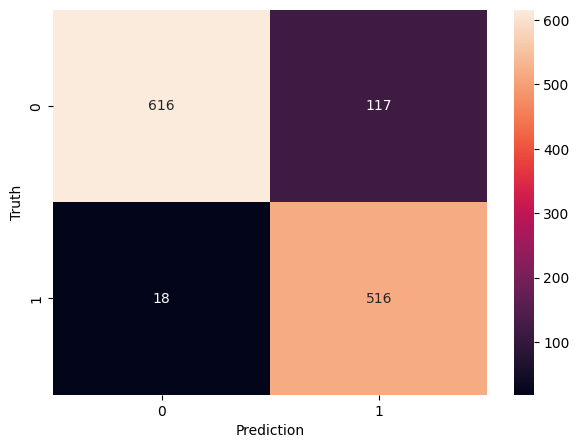

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_preds, y_test)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Use text pre-processing to remove stop words, punctuations and apply lemmatization


In [55]:
#use this utility function to get the preprocessed text data


import spacy
nlp=spacy.load('en_core_web_sm')

# load english language model and create nlp object from it

def preprocess(text):
    doc=nlp(text)
    filtered_doc= []
    for token in doc :
        if token.is_stop or token.is_punct:
            continue
        filtered_doc.append(token.lemma_)
    return " ".join(filtered_doc)
            
            


In [56]:
preprocess('This is a very great man that I love so much and all is going to go on well , this I am very confident of')

'great man love go confident'

In [57]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient

df['preprocessed_text']= df.text.apply(preprocess)
df.head()

,Unnamed: 0,title,text,label,label_num,preprocessed_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,Daniel Greenfield Shillman Journalism Fellow F...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,U.S. Secretary State John F. Kerry say Monday ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,Kaydee King @KaydeeKing November 9 2016 lesson...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,primary day New York runner Hillary Clinton Do...


In [52]:
preprocess('This is a very great man that I love so much')

'great man love'

In [59]:
X_train,X_test, y_train, y_test= train_test_split(
df.preprocessed_text,
df.label_num,
test_size=0.2,
stratify=df.label_num 
)

Let's check the scores with our best model till now

Random Forest
Attempt 5 :

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 


clf= Pipeline([
    ('BoW',CountVectorizer(ngram_range=(3,3))),
    ('model',RandomForestClassifier()) 
])

#training the model 
clf.fit(X_train,y_train)

#test
y_preds=clf.predict(X_test)

#classification_report

print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74       390
           1       0.98      0.71      0.83       877

    accuracy                           0.79      1267
   macro avg       0.79      0.84      0.78      1267
weighted avg       0.87      0.79      0.80      1267



Attempt 6:

using the sklearn pipeline module create a classification pipeline to classify the Data.
Note:

using CountVectorizer with unigram, Bigram, and trigrams.
use RandomForest as the classifier.
print the classification report.

In [70]:
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 

clf= Pipeline([
    ('BoW',CountVectorizer(ngram_range=(1,3))),
    ('Model', RandomForestClassifier())
])

#Training the model 
clf.fit(X_train, y_train)

#test
y_preds= clf.predict(X_test)

#classification report 

print(classification_report(y_preds,y_test))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       651
           1       0.86      0.89      0.87       616

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



Naive bayes seems to have the best output even without the preprocessing of the text Now, I want to see if I use the preprocess data , I can get even better acccuracy or maybe  my accuracy is going to decrease.

In [73]:
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

clf= Pipeline([
    ('BoW',CountVectorizer(ngram_range=(1,3))),
     ('model',MultinomialNB(alpha=0.75))
])
    
    
#training the data 
clf.fit(X_train,y_train)
    
#test 
y_preds= clf.predict(X_test)
    
#classification_report 

print(classification_report(y_preds,y_test))
    

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       741
           1       0.81      0.97      0.88       526

    accuracy                           0.89      1267
   macro avg       0.89      0.90      0.89      1267
weighted avg       0.91      0.89      0.89      1267



Text(58.222222222222214, 0.5, 'Truth')

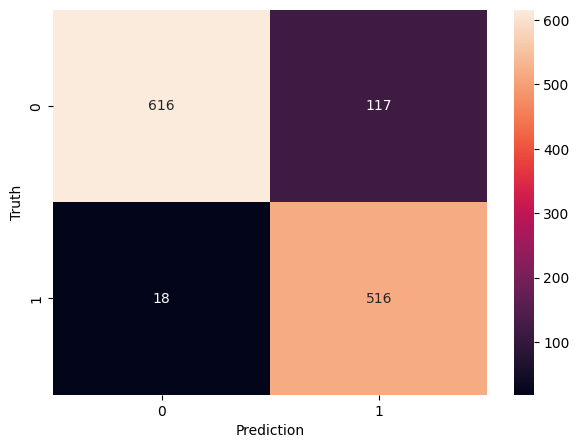

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_preds, y_test)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Text(58.222222222222214, 0.5, 'Truth')

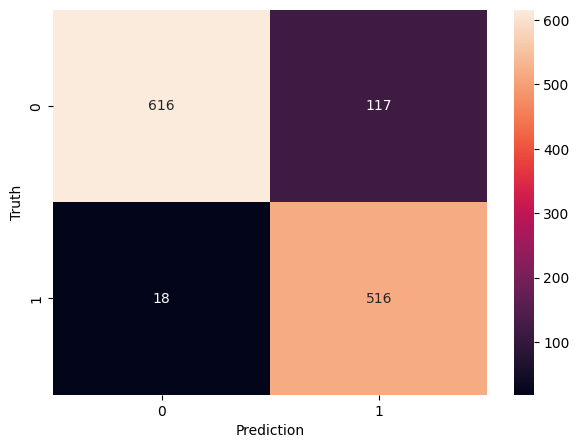

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_preds, y_test)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')